|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|gender|gender ||
|Age |Age in years| |
|sibsp |number of siblings / spouses aboard|	|
|parch |number of parents / children aboard| |
|ticket|Ticket number ||
|fare | fare| 	|
|cabin |Cabin number|	|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | Lifeboat||
|body | Body Identification Number||
|home.dest| Home/destination||

In [1]:
# Read data and describe it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Jupyter\DSML\DSML\EDA\Titanic\titanic_dataset.csv')
print(df.describe(include='all'))
#print(df.pclass.is_unique)

         Unnamed: 0       pclass     survived              name gender  \
count   1309.000000  1309.000000  1309.000000              1309   1309   
unique          NaN          NaN          NaN              1307      2   
top             NaN          NaN          NaN  Kelly, Mr. James   male   
freq            NaN          NaN          NaN                 2    843   
mean     654.000000     2.294882     0.381971               NaN    NaN   
std      378.020061     0.837836     0.486055               NaN    NaN   
min        0.000000     1.000000     0.000000               NaN    NaN   
25%      327.000000     2.000000     0.000000               NaN    NaN   
50%      654.000000     3.000000     0.000000               NaN    NaN   
75%      981.000000     3.000000     1.000000               NaN    NaN   
max     1308.000000     3.000000     1.000000               NaN    NaN   

                age        sibsp        parch    ticket    fare        cabin  \
count   1046.000000  1309.00000

In [2]:
# Find columns with missingdata
# Print shape of dataset
print(df.isnull().any().value_counts())
print(df.isnull().any().value_counts().sum())
cols = df.columns
for cols in df.columns:
    if (df[cols].isnull().any()):
        print(cols)
print(df.shape)

False    8
True     7
dtype: int64
15
age
fare
cabin
embarked
boat
body
home.dest
(1309, 15)


In [3]:
#drop columns with more than 25% missing data
#print(df.isna().any())
#print(df.isna().sum()/df.shape[0])
df=df.loc[:, pd.notnull(df).sum()>len(df)*.75]
print(df.dtypes)

Unnamed: 0      int64
pclass          int64
survived        int64
name           object
gender         object
age           float64
sibsp           int64
parch           int64
ticket         object
fare           object
embarked       object
dtype: object


In [4]:
#check data types of all columns
df.dtypes

Unnamed: 0      int64
pclass          int64
survived        int64
name           object
gender         object
age           float64
sibsp           int64
parch           int64
ticket         object
fare           object
embarked       object
dtype: object

In [5]:
#convert price to numeric
col=df.fare.str.replace('$','')
col=col.astype(float)
print(col.head,col.dtype)

#df.describe()
df.fare=col

<bound method NDFrame.head of 0       211.34
1       151.55
2       151.55
3       151.55
4       151.55
5        26.55
6        77.96
7         0.00
8        51.48
9        49.50
10      227.53
11      227.53
12       69.30
13       78.85
14       30.00
15       25.93
16      247.52
17      247.52
18       76.29
19       75.24
20       52.55
21       52.55
22       30.00
23      227.53
24      221.78
25       26.00
26       91.08
27       91.08
28      135.63
29       26.55
         ...  
1279      7.85
1280      7.90
1281      9.00
1282      8.05
1283      7.55
1284      8.05
1285      9.50
1286      7.23
1287      7.75
1288      6.50
1289      6.50
1290      7.00
1291      8.71
1292      7.55
1293      8.05
1294     16.10
1295      7.25
1296      8.66
1297      7.25
1298      9.50
1299     14.45
1300     14.45
1301      7.23
1302      7.23
1303     14.46
1304     14.45
1305     14.45
1306      7.23
1307      7.23
1308      7.88
Name: fare, Length: 1309, dtype: float64> float64


In [6]:
#find columns still having missing/na values and also count of missing data
print(df.isna().any())
k=list()
for cols in df.columns:
    if (df[cols].isnull().any()):
        k.append(cols)
        print(df[cols].isna().sum()/df.shape[0])
print('The list of columns with any null values are ',k)

Unnamed: 0    False
pclass        False
survived      False
name          False
gender        False
age            True
sibsp         False
parch         False
ticket        False
fare           True
embarked       True
dtype: bool
0.20091673032849502
0.0007639419404125286
0.0015278838808250573
The list of columns with any null values are  ['age', 'fare', 'embarked']


In [7]:
#fill na with mean for fare and age column column.
df.age.fillna(df.age.mean(),inplace=True)
df.fare.fillna(df.fare.mean(),inplace=True)


In [8]:
#drop na values for embarked column
df=df.dropna(subset=['embarked'])
print(df.isna().any())

Unnamed: 0    False
pclass        False
survived      False
name          False
gender        False
age           False
sibsp         False
parch         False
ticket        False
fare          False
embarked      False
dtype: bool


In [9]:
#- for surviced column replace 0 with D and 1 with A
# find the frequency of different values in survived column
print(df.survived.value_counts())
survived = {0:'D',1:'A'}

#df.survived = [survived[col] for col in df.survived]
print(df.survived.value_counts()/df.shape[0])

0    809
1    498
Name: survived, dtype: int64
0    0.618975
1    0.381025
Name: survived, dtype: float64


In [10]:
#find different pclass and no of people in each class
print(df.pclass.value_counts())

3    709
1    321
2    277
Name: pclass, dtype: int64


In [11]:
#find top 5 people with highest values of age. Count no of male and females in the top 5
dfgenderAge = df.sort_values(by=['age'], ascending = False)
dfgenderAge1 = dfgenderAge.head(5)
print(dfgenderAge1)
print('*'*100)
print(dfgenderAge1.gender.value_counts())


      Unnamed: 0  pclass  survived  \
14            14       1         1   
61            61       1         1   
1235        1235       3         0   
135          135       1         0   
9              9       1         0   

                                                   name  gender   age  sibsp  \
14                 Barkworth, Mr. Algernon Henry Wilson    male  80.0      0   
61    Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   
1235                                Svensson, Mr. Johan    male  74.0      0   
135                           Goldschmidt, Mr. George B    male  71.0      0   
9                               Artagaveytia, Mr. Ramon    male  71.0      0   

      parch    ticket   fare embarked  
14        0     27042  30.00        S  
61        0     19877  78.85        S  
1235      0    347060   7.78        S  
135       0  PC 17754  34.65        C  
9         0  PC 17609  49.50        C  
**************************************************

In [12]:
#find max age male and female who survived
df1=df.survived==1
df1=df[df1]
k=df1.groupby(by=['gender'])
a=k.age.max()
print(a)

gender
female    76.0
male      80.0
Name: age, dtype: float64


In [13]:
#get average age by gender
k=df.groupby(by=['gender'])
a=k.age.mean()
print(a)

gender
female    28.795931
male      30.430716
Name: age, dtype: float64


In [14]:
#get average age by people survived vs not-survived
k=df.groupby(by=['survived'])
a=k.age.mean()
print(a)

survived
0    30.389368
1    28.974711
Name: age, dtype: float64


Charts

male      843
female    464
Name: gender, dtype: int64


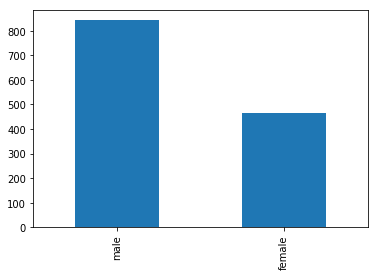

In [15]:
#bar chart showing number of people by the sex of the person
r=df.gender.value_counts()
print(r)
r.plot(kind='bar')

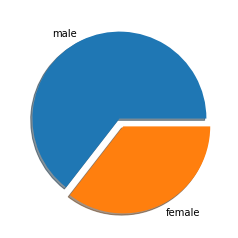

In [16]:

#Pie chart doing the same 
plt.pie(r,labels=r.index,shadow=True,explode=[0,0.1])
plt.show()

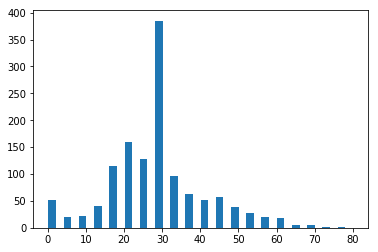

In [17]:
# plot histogram of ages of people
plt.hist(df['age'],width=2,bins=20)
plt.show()

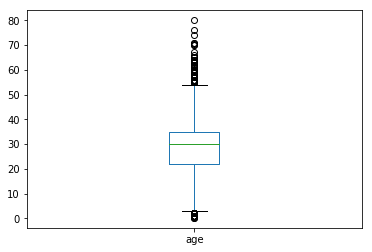

In [18]:
#box plot to look at ages of people 
df.age.plot(kind='box')

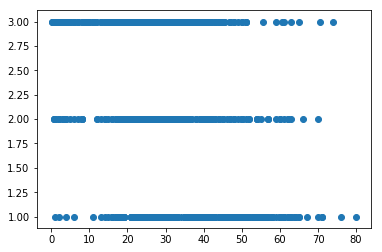

In [19]:
#Scatter plot by age and pclass
plt.scatter(df.age.values,df.pclass.values)

3    709
1    321
2    277
Name: pclass, dtype: int64


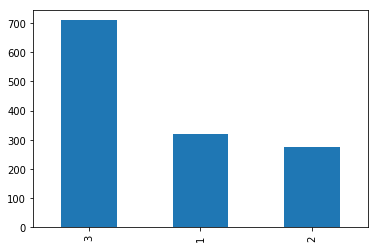

In [20]:
#plot no of people in each pclass on bar chart
r=df.pclass.value_counts()
print(r)
r.plot(kind='bar')

3    709
1    321
2    277
Name: pclass, dtype: int64


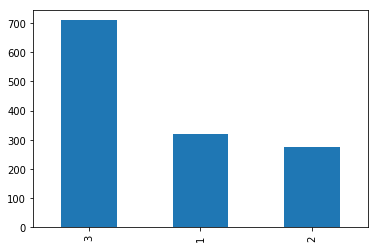

In [21]:
#plot no of people in each pclass on bar chart
r=df.pclass.value_counts()
print(r)
r.plot(kind='bar')

male      843
female    464
Name: gender, dtype: int64


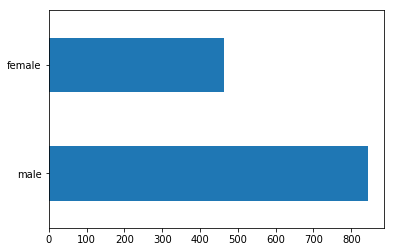

In [22]:
# plot a bar-chart depicting the ratio of males to females
r=df.gender.value_counts()
print(r)
r.plot(kind='barh')

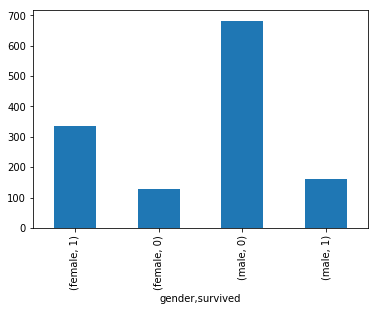

In [23]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
df1=df.groupby(['gender']).survived.value_counts()
df1.plot(kind='bar')

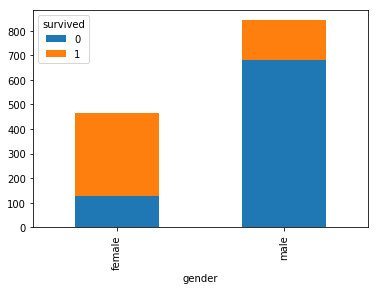

In [24]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
g=df.groupby(by=['gender'])
r=g.survived.value_counts()
r.unstack().plot(kind = 'bar',stacked='True')
plt.show()

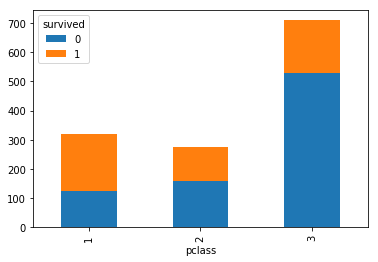

In [25]:
# plot stacked bar of survived with different pclass in same bar
g=df.groupby(by=['pclass'])
r=g.survived.value_counts()
r.unstack().plot(kind = 'bar',stacked='True')
plt.show()

MultiIndex(levels=[['C', 'Q', 'S'], ['female', 'male']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['embarked', 'gender'])
****************************************************************************************************
embarked  gender
C         female    31.046168
          male      32.352264
Q         female    28.112014
          male      30.573047
S         female    28.063141
          male      29.932080
Name: age, dtype: float64
****************************************************************************************************
gender       female       male
embarked                      
C         31.046168  32.352264
Q         28.112014  30.573047
S         28.063141  29.932080
****************************************************************************************************


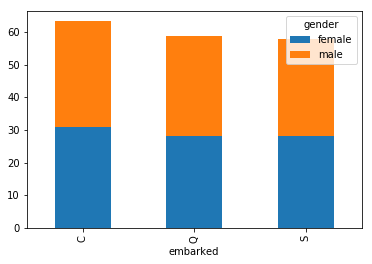

In [26]:
#Stacked bar chart by Embarked and Gender
g=df.groupby(by=['embarked','gender'])
#print(g.groups)

r=g.age.mean()
print(r.index)
print('*'*100)
print(r)
print('*'*100)
print(r.unstack())
print('*'*100)
import matplotlib.pyplot as plt
r.unstack().plot(kind = 'bar',stacked='True')
plt.show()

In [27]:
#Save the final dataset as titanic_filtered
df.to_csv('titanic_filtered.csv')